# Here are some examples of catplot functionality...

In [1]:
import avt
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np

In [2]:
# creating a datetime table with random groups and frequencies

dattime_col = pd.to_datetime(
    pd.Timestamp(dt.datetime.now().date())
    + pd.timedelta_range(
        start='0 day', 
        end='1 day', 
        freq='30T', 
        closed='left'
        )
    )

dattime_col = np.random.choice(dattime_col, size=1000)
group = np.random.choice(4, size=1000)

data = pd.DataFrame({'datetime': dattime_col, 'group': group})
data

,datetime,group
0,2022-10-06 03:00:00,0
1,2022-10-06 19:00:00,1
2,2022-10-06 21:00:00,2
3,2022-10-06 15:00:00,1
4,2022-10-06 01:00:00,0
...,...,...
995,2022-10-06 19:30:00,3
996,2022-10-06 22:00:00,2
997,2022-10-06 19:30:00,1
998,2022-10-06 06:00:00,0


## Clockplot:

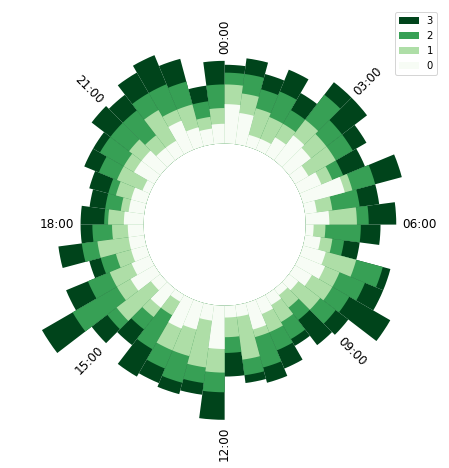

In [3]:
ax = avt.clockplot(
    data, 
    x='datetime', 
    hue='group',
    label_format='%H:%M', 
    label_freq='3H',
    cmap='Greens',
    )

# saving graph
ax.figure.savefig('./figures/clockplot.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/clockplot.png', bbox_inches='tight', dpi=300)

## Time Freq Heatmap:

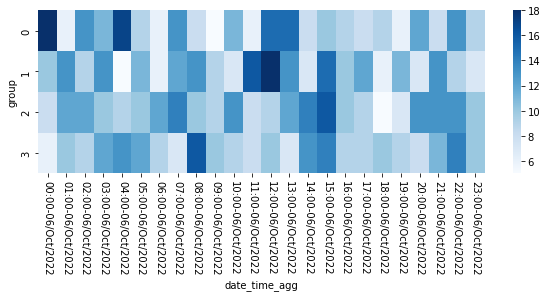

In [4]:
fig, ax = plt.subplots(1,1,figsize=(10,3))

ax = avt.timefreqheatmap(
    data,
    x='datetime',
    hue='group',
    freq='1H',
    label_format='%H:%M-%d/%b/%Y',
    cmap='Blues',
    ax=ax,
    )

# saving graph
ax.figure.savefig('./figures/timefreqheatmap.png', bbox_inches='tight', dpi=300)
ax.figure.savefig('../docs/source/figures/timefreqheatmap.png', bbox_inches='tight', dpi=300)